# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/justinas/startup-investments

Import the necessary libraries and create your dataframe(s).

In [121]:
# importing pandas library
import pandas as pd
import numpy as np

# creating dataframes
acquisitions_df = pd.read_csv('acquisitions.csv')
degrees_df = pd.read_csv('degrees.csv')
funding_rounds_df = pd.read_csv('funding_rounds.csv')
funds_df = pd.read_csv('funds.csv')
investments_df = pd.read_csv('investments.csv')
ipos_df = pd.read_csv('ipos.csv')
milestones_df = pd.read_csv('milestones.csv')
objects_df = pd.read_csv('objects.csv')
offices_df = pd.read_csv('offices.csv')
people_df = pd.read_csv('people.csv')
relationships_df = pd.read_csv('relationships.csv')

/var/folders/zf/cb3_1h9969d8z3n17n7d956r0000gn/T/ipykernel_94200/670547435.py:13: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv('objects.csv')


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [122]:
# Finding missing data in table #1: acquisitions_df
# print(acquisitions_df.isna().sum())
# print(acquisitions_df.shape)

# It appears that the column 'term_code' has by far and away the most cells with
# no data, at 7658 out of 9562 total rows in the dataframe (80.01% empty).

# print(acquisitions_df['term_code'].unique())

# The values that show up in 'term_code' (cash, stock, cash_and_stock) still seem
# relevant, though, so I think I'll leave that column in the dataframe. 

# The other columns with significant missing data ('source_url' and 'source_description')
# are columns that I'm already considering dropping as irrelevant to the analysis. 

acquisitions_df.columns

acquisitions_df.drop(columns=['source_url', 'source_description'], inplace=True)
acquisitions_df.head()

# I think I also don't care when something was 'created_at' and 'updated_at' for purposes
# of this analysis

acquisitions_df.drop(columns=['created_at', 'updated_at'], inplace=True)
acquisitions_df.head()

# That's a much nicer-looking dataframe! 


,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01


In [123]:
# Finding missing data in table #2: degrees_df

# print(degrees_df.isna().sum())
# print(degrees_df.shape)

# The 'graduated_at' column is missing data in 47.04% of its rows.  I'm debating whether
# there's any value in knowing when someone graduated in this analysis.  It could help
# determine the age of entepreneurs who are successful in getting their startups funded,
# so perhaps it's still worth keeping in. 

# The 'subject' and 'degree_type' columns are missing data in 25.83% and 10.24% of their rows,
# respectively.  They both still seem like relevant factors to the analysis, though. 

degrees_df.columns

degrees_df.drop(columns=['created_at', 'updated_at'], inplace=True)
degrees_df.head()

,id,object_id,degree_type,subject,institution,graduated_at
0,1,p:6117,MBA,NaN,NaN,NaN
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN


In [124]:
# Finding missing data in table #3: funding_rounds_df
# print(funding_rounds_df.isna().sum())
# print(funding_rounds_df.shape)

# print(funding_rounds_df['pre_money_currency_code'].unique())
# print(funding_rounds_df['post_money_currency_code'].unique())

# I'm debating whether anything pertaining to pre_money or post_money needs to stay in the
# dataframe.  I don't think companies' valuations are going to be part of this analysis -
# rather just whether they did or didn't get funding, and to some extend how much.  Other
# columns with empty rows ('source_url', 'source_description', 'created_by') can also go. 

funding_rounds_df.columns.tolist()

funding_rounds_df.drop([
    'raised_amount',
    'raised_currency_code',
    'pre_money_valuation',
    'pre_money_currency_code',
    'post_money_valuation',
    'post_money_currency_code',
    'source_url',
    'source_description',
    'created_by', 
    'created_at',
    'updated_at'
], axis=1, inplace=True)

funding_rounds_df.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,0.0,0.0,2,0,0
1,2,2,c:5,2004-09-01,angel,angel,500000.0,0.0,0.0,2,0,1
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,115000000.0,0.0,3,0,0
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,525000000.0,0.0,4,0,0
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,0.0,0.0,2,0,0


In [125]:
# Finding missing data in table #3: funds_df

print(funds_df.isna().sum())
print(funds_df.shape)

# Not much data missing from this dataframe, and most of what's missing is in columns
# that I don't care about anyway. 

funds_df.drop(['source_url', 'source_description', 'created_at', 'updated_at'], axis=1, inplace=True)
funds_df.head()

id                        0
fund_id                   0
object_id                 0
name                      0
funded_at               115
raised_amount             0
raised_currency_code      0
source_url              292
source_description      346
created_at                0
updated_at                0
dtype: int64
(1564, 11)


,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD


In [126]:
# Finding missing data in table #5: investments_df

print(investments_df.isna().sum())
print(investments_df.shape)

# Whoa!  No missing data? 

investments_df.drop(columns=['created_at', 'updated_at'], axis=1, inplace=True)
investments_df.head()

id                    0
funding_round_id      0
funded_object_id      0
investor_object_id    0
created_at            0
updated_at            0
dtype: int64
(80902, 6)


,id,funding_round_id,funded_object_id,investor_object_id
0,1,1,c:4,f:1
1,2,1,c:4,f:2
2,3,3,c:5,f:4
3,4,4,c:5,f:1
4,5,4,c:5,f:5


In [127]:
# Finding missing data in table #6: ipos_df

print(ipos_df.isna().sum())
print(ipos_df.shape)

# Checking values in some of the columns that are missing data

print(ipos_df['valuation_currency_code'].unique().tolist())
print(ipos_df['raised_currency_code'].unique().tolist())

# Seems like those columns are still relevant, even with missing data

ipos_df.drop(columns=['source_url', 'source_description', 'created_at', 'updated_at'], axis=1, inplace=True)
ipos_df.head()

id                            0
ipo_id                        0
object_id                     5
valuation_amount              0
valuation_currency_code       2
raised_amount                 0
raised_currency_code        560
public_at                   600
stock_symbol                  0
source_url                 1068
source_description         1079
created_at                    0
updated_at                    0
dtype: int64
(1259, 13)
['USD', 'JPY', nan, 'CAD', 'EUR', 'GBP']
['USD', nan, 'EUR', 'JPY', 'GBP', 'CAD']


,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol
0,1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL
1,2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT
2,3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS
3,4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG
4,5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN


In [128]:
# Finding missing data in table #7: milestones_df

print(milestones_df.isna().sum())
print(milestones_df.shape)

# All data is here, except in columns I already don't care about

print(milestones_df['milestone_code'].unique())

# Looks like the 'milestone_code' column also only has 'other' in it as a value,
# which isn't particularly helpful, so I'm going to drop that column, as well. 

milestones_df.drop([
    'milestone_code',
    'source_url',
    'source_description',
    'created_at',
    'updated_at'
], axis=1, inplace=True)

milestones_df.head()

id                        0
object_id                 0
milestone_at              0
milestone_code            0
description               0
source_url             8055
source_description    10188
created_at                0
updated_at                0
dtype: int64
(39456, 9)
['other']


,id,object_id,milestone_at,description
0,1,c:12,2008-06-09,Survives iPhone 3G Stevenote
1,2,c:3138,2008-06-17,Twhirl announces support for Seesmic video pla...
2,3,c:59,2008-06-18,More than 4 Billion videos viewed at Google Si...
3,4,c:314,2008-06-18,Reddit goes Open Source
4,5,c:314,2008-01-22,Adds the ability to create your own Reddits


In [129]:
# Finding missing data in table #8: objects_df

print(objects_df.isna().sum())
print(objects_df.shape)

# This table has a TON of missing data, which is great, because the file is HUGE
# and I need to trim it down a lot to get it to work in Tableau.  So, let's get at
# it...

# 'parent_id' is 94.01% empty.  Gone.
# 'category_code' is 73.37% empty, but it's a column that might be relevant in my analysis,
# so I'm going to leave it for the moment.
# 'founded_at' is 78.29% empty, but it seems like it could he relevant to see how much time
# exists between an entity getting founded and it getting established, so I'm going to leave
# it for the moment.
# 'closed_at', however, I don't think will be relevant, so I'm going to drop it

print(objects_df.columns.tolist())

objects_df.drop([
    'parent_id', 
    'permalink',
    'closed_at',
    'domain', 
    'homepage_url', 
    'twitter_username', 
    'logo_url', 
    'logo_width', 
    'logo_height', 
    'short_description', 
    'description', 
    'overview',
    'created_by', 
    'created_at', 
    'updated_at'
], axis=1, inplace=True)

objects_df.head()

id                          0
entity_type                 0
entity_id                   0
parent_id              434936
name                        4
normalized_name            31
permalink                   0
category_code          339465
status                      0
founded_at             362210
closed_at              459842
domain                 287709
homepage_url           287709
twitter_username       336562
logo_url               253801
logo_width                  0
logo_height                 0
short_description      455034
description            367646
overview               227416
tag_list               356155
country_code           367608
state_code             407891
city                   371967
region                      0
first_investment_at    445695
last_investment_at     445695
investment_rounds           0
invested_companies          0
first_funding_at       431144
last_funding_at        431144
funding_rounds              0
funding_total_usd           0
first_mile

,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,tag_list,country_code,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,"wiki, seattle, elowitz, media-industry, media-...",USA,...,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaN,"flektor, photo, video",USA,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6
2,c:100,Company,100,There,there,games_video,acquired,NaN,"virtualworld, there, teens",USA,...,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,"social-network, new, website, web, friends, ch...",NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,"watch, full-length, moives, online, for, free,...",NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0


In [130]:
# Finding missing data in table #9: offices_df

print(offices_df.isna().sum())
print(offices_df.shape)

# print(offices_df['description'].unique())
# this column seems unnecessary

# specific addresses seem unnecessary

# offices_df.drop(columns=[
#     'description',
#     'address1',
#     'address2', 
#     'created_at',
#     'updated_at'
# ], axis=1, inplace=True)

# offices_df.head()

# Seems like 'region' and 'city' are much more complete sources of data than 'zip_code', 
# 'state_code', so I guess I'll drop those two, as well.

# offices_df.drop(columns=['zip_code', 'state_code'], axis=1, inplace=True)
offices_df.head()

id                   0
object_id            0
office_id            0
description      44188
region               0
address1         18288
address2         68198
city              5168
zip_code         19488
state_code       50701
country_code         0
latitude             0
longitude            0
created_at      112718
updated_at      112718
dtype: int64
(112718, 15)


,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


In [131]:
# Finding missing data in table #10: people_df

print(people_df.isna().sum())
print(people_df.shape)

# With birthplaces, which was kind of the only potentially useful column in this table,
# being 87.61% empty, this whole dtable seems rather useless.  I'll hold onto it for now,
# just in case.

people_df.drop(columns=['birthplace'], axis=1, inplace=True)
people_df.head()

id                       0
object_id                0
first_name               9
last_name                4
birthplace          198625
affiliation_name        25
dtype: int64
(226709, 6)


,id,object_id,first_name,last_name,affiliation_name
0,1,p:2,Ben,Elowitz,Blue Nile
1,2,p:3,Kevin,Flaherty,Wetpaint
2,3,p:4,Raju,Vegesna,Zoho
3,4,p:5,Ian,Wenig,Zoho
4,5,p:6,Kevin,Rose,i/o Ventures


In [ ]:
# Finding missing data in table #11: relationships_df

print(relationships_df.isna().sum())
print(relationships_df.shape)

# Are 'is_past' and 'sequence' in any way relevant?  I don't think so... 

# relationships_df.drop([
#     'start_at',
#     'end_at',
#     'is_past',
#     'sequence',
#     'created_at',
#     'updated_at'
# ], axis=1, inplace=True)

relationships_df.head()

# This whole table is starting to feel rather unnecessary, as well. 

id                             0
relationship_id                0
person_object_id               0
relationship_object_id         0
start_at                  195883
end_at                    301832
is_past                        0
sequence                       0
title                      13352
created_at                     0
updated_at                     0
dtype: int64
(402878, 11)


,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

Empty DataFrame
Columns: [id, acquisition_id, acquiring_object_id, acquired_object_id, term_code, price_amount, price_currency_code, acquired_at]
Index: []
Empty DataFrame
Columns: [id, entity_type, entity_id, name, normalized_name, category_code, status, founded_at, tag_list, country_code, state_code, city, region, first_investment_at, last_investment_at, investment_rounds, invested_companies, first_funding_at, last_funding_at, funding_rounds, funding_total_usd, first_milestone_at, last_milestone_at, milestones, relationships]
Index: []

[0 rows x 25 columns]


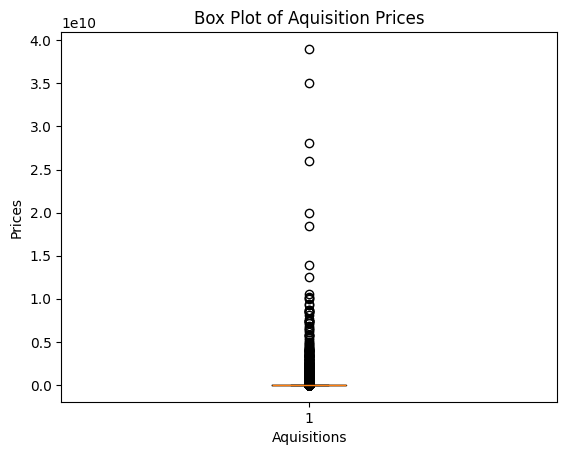

-750000.0
1250000.0


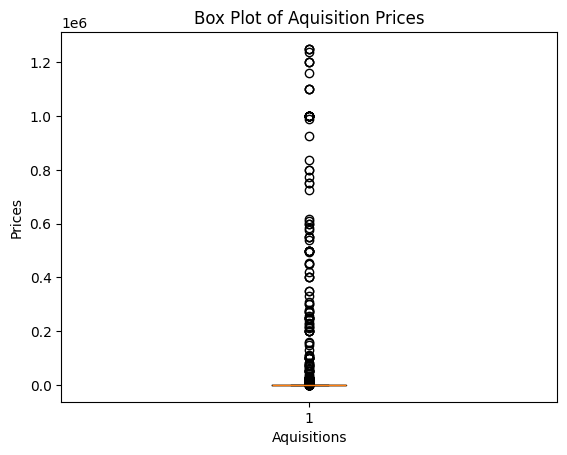

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Finding irregular data in table #1: acquisitions_df

# print(acquisitions_df['price_amount'].describe())
# The mean is much higher than the median, which suggested that the data is skewed by a few
# really large aquisitions pulling the mean up.  Not sure if this is inherently bad, though,
# this may just be how the accurate data tracks. 

# The max of 2.6 trillion is exponentially higher than the 75% of 500000.  Again, this points
# to a small number of extreme data points heavily skewing the dataset.  

# There appear to be a lot of rows with 0s in them, as evidenced by the 25% and 50%.
# print((acquisitions_df['price_amount'] == 0).sum())
# print(acquisitions_df['price_amount'].count())

# # Yeah, 72.82% of the rows appear to have 0 values in them.  What does that mean for my
# # dataset?  

# plt.boxplot(acquisitions_df['price_amount'])
# plt.title('Box Plot of Aquisition Prices')
# plt.xlabel('Aquisitions')
# plt.ylabel('Prices')
# plt.show()

# Okay, this visualiation seems to show that that 2.6 trillion number is an outlier.  What
# is that acqusition? 

prices_sorted = acquisitions_df['price_amount'].sort_values(ascending=False)
prices_sorted.head()

# # Okay, there are multiple aqsuitions greater than 10 billion, but only one over 1 trillion.
# # Which aqsuition was over 1 trillion?  Apparently it's the one with id 5348

acquisition_5348 = acquisitions_df.loc[acquisitions_df['id'] == 5348]
print(acquisition_5348)

# Apparently it's aquired_at date was 1984-06-27, but I can't see a way to link that data to
# another table that also lists aquired_at dates... 

search_date = pd.to_datetime('1984-06-27')
matching_rows = objects_df[objects_df.isin([search_date]).any(axis=1)]
print(matching_rows)

# It's possible that the columns containing dates in objects_df aren't in datetime format, but
# I think I can just say that the aqsuition of 2.6 trillion can safely be considered an outlier
# and dropped.  

# acquisitions_df = acquisitions_df.drop(index=5347)

plt.boxplot(acquisitions_df['price_amount'])
plt.title('Box Plot of Aquisition Prices')
plt.xlabel('Aquisitions')
plt.ylabel('Prices')
plt.show()

# Re-vizualition appears to show that the row containing the $2.6 trillion acquisition was
# successfully dropped.  Now I'm starting to wonder if those acquisitions over $10 billion
# should be considered outliers, as well.  Maybe I should've just done IQR analysis rather
# than relying on visualizations? 

valid_prices = acquisitions_df['price_amount'].dropna()

Q1 = valid_prices.quantile(0.25)
Q3 = valid_prices.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = acquisitions_df[(acquisitions_df['price_amount'] < lower_bound) | (acquisitions_df['price_amount'] > upper_bound)]
outliers.head()

print(lower_bound)
print(upper_bound)

cleaned_acquisitions_df = acquisitions_df[
    (acquisitions_df['price_amount'] >= lower_bound) & 
    (acquisitions_df['price_amount'] <= upper_bound)]

cleaned_acquisitions_df.head()

plt.boxplot(cleaned_acquisitions_df['price_amount'])
plt.title('Box Plot of Aquisition Prices')
plt.xlabel('Aquisitions')
plt.ylabel('Prices')
plt.show()


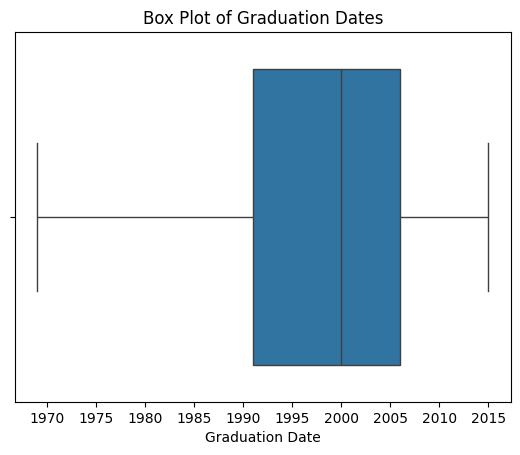

1968-07-01 12:00:00


,id,object_id,degree_type,subject,institution,graduated_at
4324,4325,p:41877,BA,"Psychology, Marketing",University of Dayton,1969-01-01
73430,73431,p:228504,NaN,NaN,Bristol Grammar School,1969-01-01
31883,31884,p:11212,BA,NaN,Brandeis University,1969-01-01
105994,105995,p:264440,BA,English Literature,University of Notre Dame,1969-01-01
65502,65503,p:153009,BA,Sociology,St. Pauls College,1969-01-01


In [142]:
# Finding irregular data in table #2: degrees_df

# It seems like outliers would be most likely in the graduated_at column

# Ensuring column is in valid datetime format
degrees_df['graduated_at'] = pd.to_datetime(degrees_df['graduated_at'], errors='coerce')

# Dropping any rows that didn't have valid dates
valid_dates = degrees_df['graduated_at'].dropna()

# Usnig the IQR to find outliers
Q1 = valid_dates.quantile(0.25)
Q3 = valid_dates.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = degrees_df[(degrees_df['graduated_at'] < lower_bound) | (degrees_df['graduated_at'] > upper_bound)]
outliers.head()
#outliers.tail()

# I'm struggling to understand what this IQR analysis is actually telling me re: what dates are
# outliers.  Maybe a boxplot would be more helpful? 

# Apparently matplotlib doesn't handle datetimes directly.  So, if that's accurate, I just learned
# that.  Apparently seaborn does, though.  

sns.boxplot(x='graduated_at', data=degrees_df)
plt.title('Box Plot of Graduation Dates')
plt.xlabel('Graduation Date')
plt.show()

# What is the axtual lower bound being shown there?
print(lower_bound)

# So, anything before July 1, 1968 is an outlier? 

# Dropping everythign from beefore July 1, 1968
degrees_df = degrees_df[degrees_df['graduated_at'] > '1968-07-01']

# Verifying drop worked
degrees_sorted = degrees_df.sort_values(by='graduated_at', ascending=True)
degrees_sorted.head()

# Looks like it worked


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?